In [ ]:
%matplotlib inline


## Wollastonite, 29Si (I=1/2)

29Si (I=1/2) spinning sideband simulation.


Wollastonite is a high-temperature calcium-silicate, $\beta−\text{Ca}_3\text{Si}_3\text{O}_9$, with three distinct $^{29}\text{Si}$ sites. The $^{29}\text{Si}$ tensor parameters were obtained from Hansen *et. al.*[1]

In [1]:
import matplotlib.pyplot as plt

from mrsimulator import Simulator, SpinSystem, Site
from mrsimulator.methods import BlochDecaySpectrum

## Step 1: Create Spin systems.

#### Sites

In [2]:
S29_1 = Site(
    isotope="29Si",
    isotropic_chemical_shift=-89.0,  # in ppm
    shielding_symmetric={"zeta": 59.8, "eta": 0.62},  # zeta in ppm
)
S29_2 = Site(
    isotope="29Si",
    isotropic_chemical_shift=-89.5,  # in ppm
    shielding_symmetric={"zeta": 52.1, "eta": 0.68},  # zeta in ppm
)
S29_3 = Site(
    isotope="29Si",
    isotropic_chemical_shift=-87.8,  # in ppm
    shielding_symmetric={"zeta": 69.4, "eta": 0.60},  # zeta in ppm
)

sites = [S29_1, S29_2, S29_3]  # all sites

#### Spin systems

In [3]:
spin_systems = []
for i in range(3):
    system = SpinSystem(sites=[sites[i]])
    spin_systems.append(system)

You can also use list comprehension instead of python for loops

``spin_systems = [SpinSystem(sites=[s]) for s in sites]``

## Step 2: Create the methods

Create a Bloch decay spectrum method.

In [4]:
method = BlochDecaySpectrum(
    channels=["29Si"],
    magnetic_flux_density=14.1,  # in T
    rotor_frequency=1500,  # in Hz
    spectral_dimensions=[
        {
            "count": 2048,
            "spectral_width": 25000,  # in Hz
            "reference_offset": -10000,  # in Hz
            "label": r"$^{29}$Si resonances",
        }
    ],
)

## Step 3: Setup and run the simulation

In [8]:
sim = Simulator()
sim.spin_systems = spin_systems  # add the spin systems
sim.methods = [method]  # add the method
sim.run()

Plot of the spectrum.

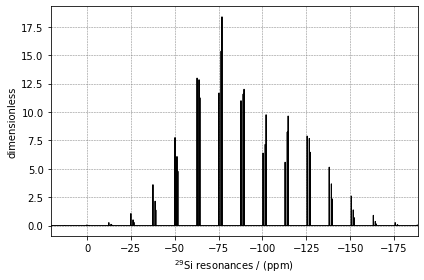

In [9]:
# The plot of the simulation before signal processing.
ax = plt.subplot(projection="csdm")
ax.plot(sim.methods[0].simulation, color="black", linewidth=1)
ax.invert_xaxis()
plt.tight_layout()
plt.show()

### Add post-simulation signal processing.

Read more at [signal processing](https://mrsimulator.readthedocs.io/en/stable/signal_processing.html).

In [10]:
import mrsimulator.signal_processing as sp
import mrsimulator.signal_processing.apodization as apo

In [28]:
processor = sp.SignalProcessor(
    operations=[
        sp.IFFT(),
        apo.Exponential(FWHM="70 Hz"),
        sp.FFT()
    ]
)
processed_data = processor.apply_operations(data=sim.methods[0].simulation)

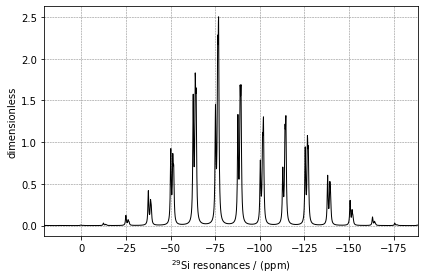

In [29]:
# The plot of the simulation after signal processing.
ax = plt.subplot(projection="csdm")
ax.plot(processed_data.real, color="black", linewidth=1)
ax.invert_xaxis()
plt.tight_layout()
plt.show()

1. Hansen, M. R., Jakobsen, H. J., Skibsted, J., $^{29}\text{Si}$ Chemical Shift Anisotropies in Calcium Silicates from High-Field $^{29}\text{Si}$ MAS NMR Spectroscopy, Inorg. Chem. 2003, **42**, *7*, 2368-2377. [DOI: 10.1021/ic020647f](https://doi.org/10.1021/ic020647f)

